#Task 1: Dilation and Erosion
You are required to implement two functions that will simulate the behaviour of morphological Dilation and Erosion. For each of these functions, we will be considering a parameter, $SE$, which denotes the structuring element which we will need to preconstruct before passing them to the corresponding function.

Complete the two functions given in the following code cells:

In [3]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from skimage import io, measure
from skimage import filters
def threshold_image(image, threshold=128):
    binary_image = (image >= threshold).astype(np.uint8)
    return binary_image


In [4]:
def dilation(image, size):
  #Implement this
    h, w = image.shape

    dilated_image = np.zeros((h, w), dtype=image.dtype)
    half_size = size // 2
    for i in range(h):
        for j in range(w):
            max_val = 0
            for a in range(max(0, i - half_size), min(h, i + half_size + 1)):
                for b in range(max(0, j - half_size), min(w, j + half_size + 1)):
                    max_val = max(max_val, image[a, b])
            dilated_image[i, j] = max_val

    return dilated_image

In [5]:
def erosion(image, size):
  #Implement this
    h, w = image.shape
    result = np.ones((h, w), dtype=image.dtype) * 255
    half_size = size // 2
    for i in range(h):
        for j in range(w):
            min_val = 255
            for a in range(max(0, i - half_size), min(h, i + half_size + 1)):
                for b in range(max(0, j - half_size), min(w, j + half_size + 1)):
                    min_val = min(min_val, image[a, b])
            result[i, j] = min_val

    return result


# Task 1: Output and Analysis
For this task, use an appropriate image from Chapter 09.zip. Use your previously implemented functions to show the outputs of the dilation and erosion functions on the sample image. In addition, generate required outputs to provide your analysis on the following observations:
<ol>
<li> What happens when you apply dilation on a sample image multiple times using the same structuring element? </li>

<li> What happens when you apply erosion on a sample image multiple times using the same structuring element? </li>

</ol>

## Effects of Repeated Dilation and Erosion

### Dilation
Dilation is a morphological operation that expands white regions (foreground) in a binary image. Each time dilation is applied:
- The white regions grow further, with boundaries expanding by the size and shape of the structuring element (kernel) used.
- With each iteration, the white regions (foreground) continue to expand outward.
- Eventually, if you keep applying dilation multiple times, all small holes within white regions will be filled, and separate white regions will merge into one large connected region if they are close enough.

**Effect of Repeated Dilation**:
- **Expands** boundaries of foreground objects in the image.
- **Merges** nearby objects into a single connected region if they are close enough.
- **Fills holes** within foreground regions after enough iterations.

### Erosion
Erosion is the opposite of dilation; it shrinks white regions in a binary image. Each time erosion is applied:
- The white regions (foreground) shrink, with boundaries retracting inward by the size and shape of the structuring element.
- With each iteration, white regions get smaller and may even disappear completely if they’re smaller than the structuring element.

**Effect of Repeated Erosion**:
- **Shrinks** boundaries of foreground objects in the image.
- **Removes small objects** entirely if they’re smaller than the structuring element.
- Eventually, **isolated objects** or thin parts of objects are eroded away, leaving either no foreground or just small remnants.


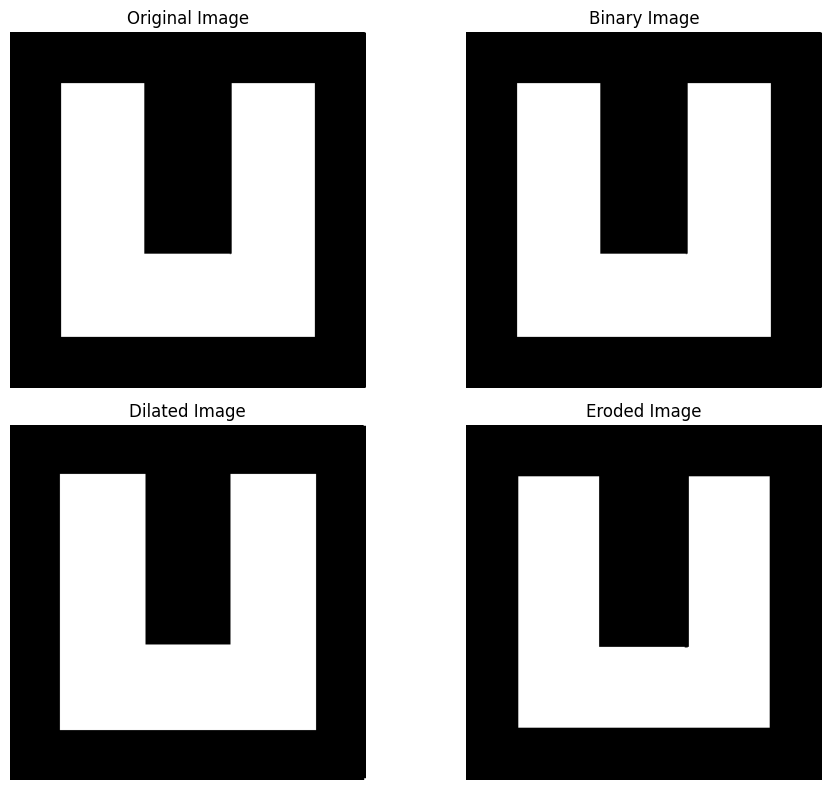

In [6]:
# Generate outputs for Task 1 here
image = cv2.imread('ushape.tif', cv2.IMREAD_GRAYSCALE)

binary_image = threshold_image(image, threshold=128)
SE = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])


dilated_image = dilation(image,5)
eroded_image = erosion(image, 5)


plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title("Original Image")
plt.imshow(image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Binary Image")
plt.imshow(binary_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Dilated Image")
plt.imshow(dilated_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Eroded Image")
plt.imshow(eroded_image, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

(-0.5, 598.5, 598.5, -0.5)

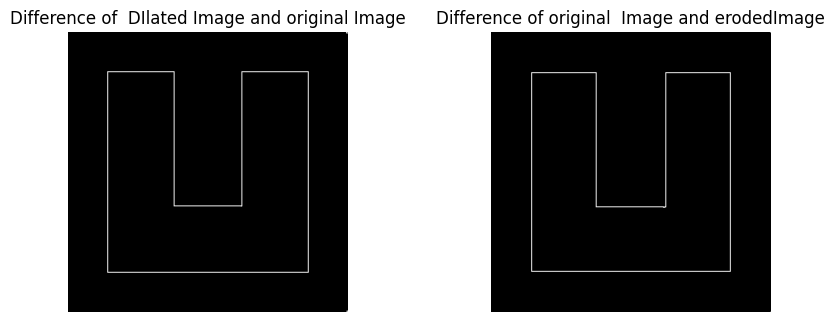

In [7]:
diff_image=dilated_image-image
diff_image2=image-eroded_image

plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
plt.title("Difference of  DIlated Image and original Image")
plt.imshow(diff_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Difference of original  Image and erodedImage")
plt.imshow(diff_image2, cmap='gray')
plt.axis('off')


##Analysis:
[Write your analysis here]
####Ans:
Here we use a square structuring element to dialation and erosion .They both are morphological dual . Avobe two pictures are dialated image minus original and original image minus dilated image respectively. Dialation enlarge the object by (m-1) /2 dimension in every side as our SE was a square,whereas erosion basically shrinks by (m-1)/2 in each side. so the result is smooth border of object with equal thickness in every side for both dilation and erodion

# Task 2
Granulometry is a field that deals with determining the size distribution of particles in an image. Determine the sizes of granules in "Fig0941(a)(wood_dowels).tif" which is an image of wood dowel plugs of two dominant sizes.

Your task is to write a function which should perform opening with circular SEs of variable sizes and generate a graph plot showing the difference in surface area vs radius of SE.

It is recommended to apply smoothing on the given image before you apply the Opening operations.

In [8]:
def opening(image, SE):
    eroded = cv2.erode(image, SE)
    opened_image = cv2.dilate(eroded, SE)
    return opened_image

In [9]:
def granulometry(image, max_radius=30):
    result = []
    differences = []
    smoothed_image = cv2.GaussianBlur(image, (3, 3), 0)
    prev = np.sum(smoothed_image, dtype=np.float64)

    for i in range(1, max_radius + 1):
        structuring_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (2 * i + 1, 2 * i + 1))
        opening = cv2.morphologyEx(smoothed_image, cv2.MORPH_OPEN, structuring_element)
        current_sum = np.sum(opening, dtype=np.float64)

        difference =-(current_sum - prev)
        prev = current_sum

        result.append(current_sum)
        differences.append(difference)

    return result, differences


# Task 2: Output and Analysis
Use your previously implemented functions to show the output of the granulometry technique on the mentioned sample image.

Provide your analysis on the following topic:
<ol>
<li> Why is it recommended to apply smoothing first before performing the opening? </li>

</ol>

# Why Apply Smoothing Before Opening in Image Processing

In image processing, applying smoothing before performing morphological operations like opening is often recommended for several reasons:

1. **Noise Reduction**: Smoothing reduces noise in the image, preventing small artifacts from being misinterpreted during opening.
  
2. **Preservation of Structures**: Smoothing helps preserve actual structures while removing minor variations, allowing opening to retain larger object shapes.
  
3. **Improved Results**: Clearer contours and boundaries in a smoothed image allow morphological operations to work more effectively, leading to better segmentation.
  
4. **Control Over Results**: Smoothing provides control over detail preservation before morphological operations, aiding in fine-tuning preprocessing to meet specific analysis needs.



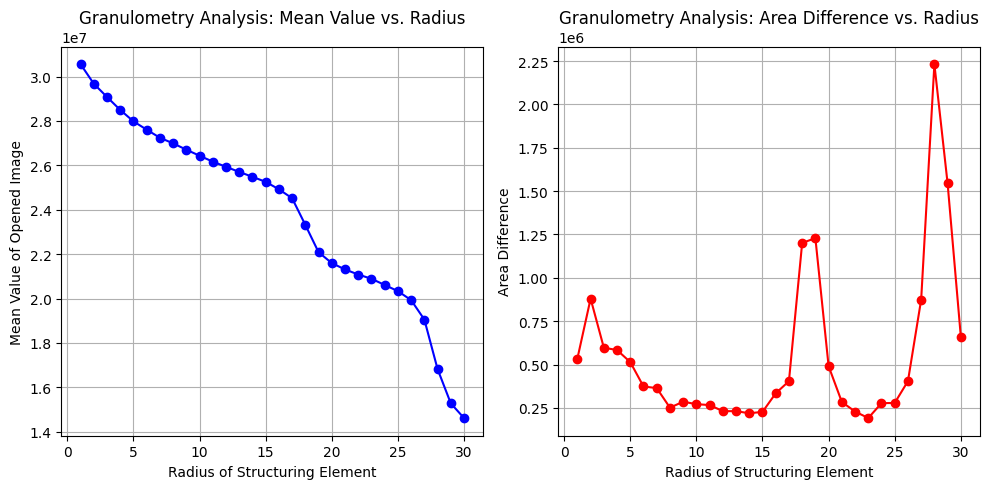

In [42]:
# Load the image
image = cv2.imread('granulometry.tif', cv2.IMREAD_GRAYSCALE)
mean_values, area_differences = granulometry(image, max_radius=30)
radii = range(1, 31)
plt.figure(figsize=(10, 5))

# Plot mean values of opened images
plt.subplot(1, 2, 1)
plt.plot(radii, mean_values, marker='o', linestyle='-', color='b')
plt.xlabel("Radius of Structuring Element")
plt.ylabel("Mean Value of Opened Image")
plt.title("Granulometry Analysis: Mean Value vs. Radius")
plt.grid(True)

# Plot area differences
plt.subplot(1, 2, 2)
plt.plot(radii, area_differences, marker='o', linestyle='-', color='r')
plt.xlabel("Radius of Structuring Element")
plt.ylabel("Area Difference")
plt.title("Granulometry Analysis: Area Difference vs. Radius")
plt.grid(True)

plt.tight_layout()
plt.show()


## Analysis:
[Write your analysis here]
## Granulometry Analysis

### Mean Value of Opened Image vs. Radius (Left Plot)
- **Trend**: Mean value decreases as the radius of the structuring element increases.
- **Key Observations**:
  - Gradual decline initially, followed by a steeper drop around radius 16 to 18 and  26 to 28.
- **Interpretation**: Larger structuring elements remove more details, reducing the mean image value. This indicates a reduction in small-scale features as radius grows.

### Area Difference vs. Radius (Right Plot)
- **Trend**: Peaks in area difference at radii around 18, and 28.
- **Key Observations**:
  - Initial peak at radius 1 (small details), significant peak around radius 20, and another at radius 30 (larger structures).
- **Interpretation**: Peaks reveal the presence of image structures at specific scales, with larger peaks indicating dominant feature sizes.




# Task 3
Consider the image given in "FigP0934(blobs_in_circular_arrangement).tif", which shows a region of small circles enclosed by a region of larger circles. Locate the boundary between those distinct texture regions.

In [11]:
def locate_boundary(image):

    fig = plt.figure(figsize=(10, 10))

    #Closing operation
    plt.subplot(2, 2, 1)
    structural_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (50, 50))
    step1 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, structural_element, iterations=1)
    plt.imshow(step1, cmap='gray')
    plt.title('After Closing (50 unit radius)')
    plt.axis('off')

    #Opening operation
    plt.subplot(2, 2, 2)
    structural_element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (60, 60))
    step2 = cv2.morphologyEx(step1, cv2.MORPH_OPEN, structural_element, iterations=2)
    plt.imshow(step2, cmap='gray')
    plt.title('After Opening (60 unit radius)')
    plt.axis('off')

    # Step 3: Extracting the gradient
    plt.subplot(2, 2, 3)
    boundary = cv2.dilate(step2, np.ones((2, 2), np.uint8)) - cv2.erode(step2, np.ones((2, 2), np.uint8))
    plt.imshow(boundary, cmap='gray')
    plt.title('Extracting Gradient')
    plt.axis('off')

    # Step 4: Superimposing the boundary on the original image
    plt.subplot(2, 2, 4)
    superimposed = cv2.addWeighted(image, 0.7, boundary, 0.5, 0)
    plt.imshow(superimposed, cmap='gray')
    plt.title('Superimposed Boundary')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


# Task 3: Output and Analysis
Show the output of the locateBoundary function on the mentioned sample image.

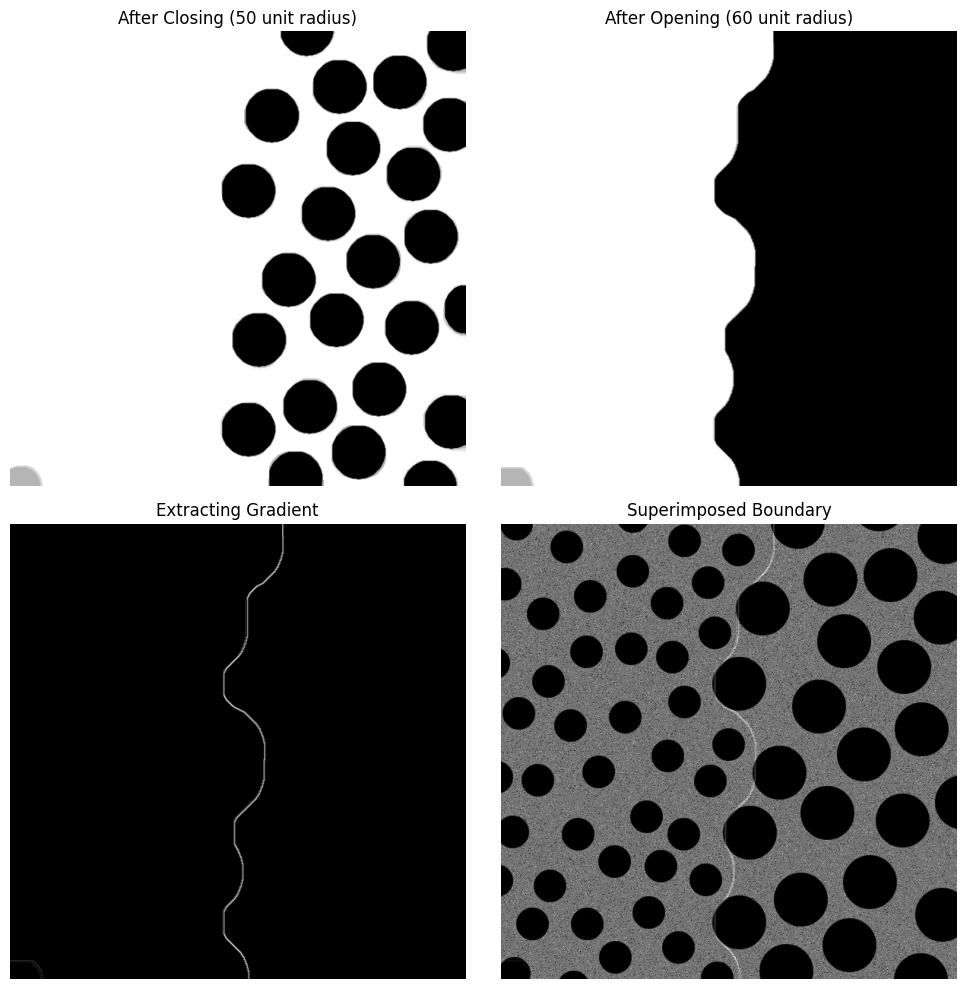

In [12]:
image = cv2.imread('blob.tif', cv2.IMREAD_GRAYSCALE)
locate_boundary(image)

#Task 4
A preprocessing step in an application of microscopy is concerned with the issue of isolating individual round particles from similar particles that overlap in groups of two or more particles as shown in the image "FigP0936(bubbles_on_black_background).tif".

Assuming that all particles are of the same size, propose a morphological algorithm that produces three images consisting respectively of
<ol>
<li> Only of particles that have merged with the boundary of the image.</li>

<li> Only overlapping particles.</li>

<li> Only nonoverlapping particles.</li>

</ol>

#Why use granulometry here
I used connected component area calculation from CV2 library to distinguish between overlappign and non-overlapping circles. for that i need to find the area of single circle which further equires the radius of the circles.Here basically I used some brute forcing for upper range of area .But this provides a good approximation of lower range (area of a single circular blob).

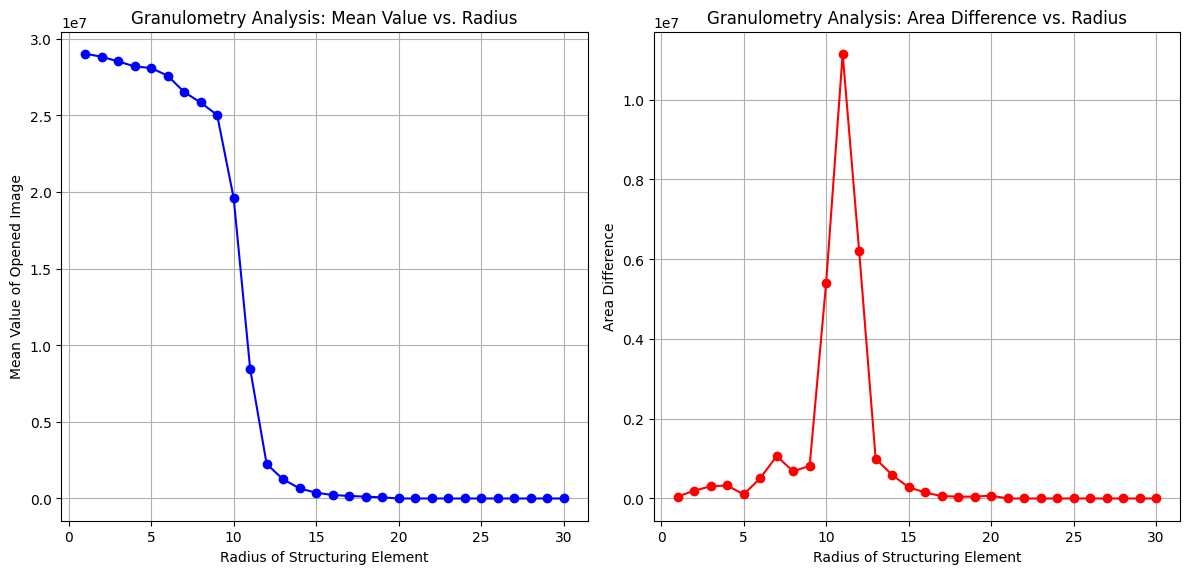

In [43]:
#finding granulometry of this picture for appropiate SE size
# Load the image
image = cv2.imread('blobs2.tif', cv2.IMREAD_GRAYSCALE)
mean_values, area_differences = granulometry(image, max_radius=30)
radii = range(1, 31)
plt.figure(figsize=(12, 6))

# Plot mean values of opened images
plt.subplot(1, 2, 1)
plt.plot(radii, mean_values, marker='o', linestyle='-', color='b')
plt.xlabel("Radius of Structuring Element")
plt.ylabel("Mean Value of Opened Image")
plt.title("Granulometry Analysis: Mean Value vs. Radius")
plt.grid(True)

# Plot area differences
plt.subplot(1, 2, 2)
plt.plot(radii, area_differences, marker='o', linestyle='-', color='r')
plt.xlabel("Radius of Structuring Element")
plt.ylabel("Area Difference")
plt.title("Granulometry Analysis: Area Difference vs. Radius")
plt.grid(True)

plt.tight_layout()
plt.show()

In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def microscopy(image_path):
    image = plt.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Smoothing with a 3x3 kernel
    image = cv2.filter2D(image, -1, np.ones((5, 5), np.float32) / 5)
    _, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

    output = image.copy()
    h, w = output.shape

    for i in range(h):
        for j in range(w):
            if (i == 0 or i == h - 1 or j == 0 or j == w - 1) and (output[i, j] == 255):
                cv2.floodFill(output, None, (j, i), 0)

    # Prepare the three output images
    filled_border_particles = output
    particles_merged_with_boundary = image - output

    return image, filled_border_particles, particles_merged_with_boundary

#Analysis
Here this method only find the particles those are merged with boundar by floodfill algorithm and we run the algorithm only for the boundaries so we applied that if-else conditon above.

# Task 4: Output and Analysis
Show the output of the microscopy function on the mentioned sample image.

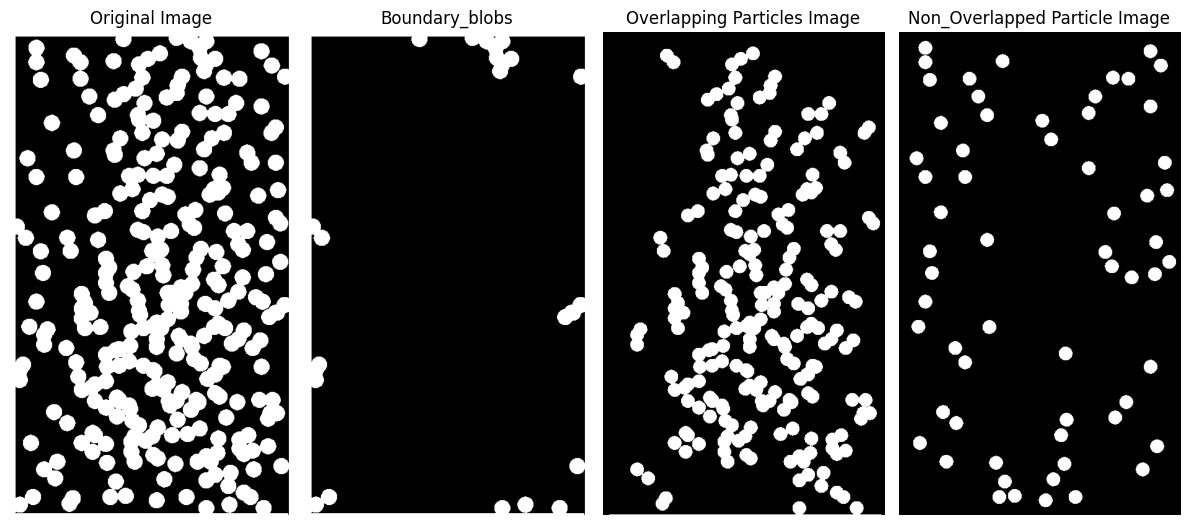

In [46]:
original_img, filled_border_img, boundary_particles_img = microscopy("blobs2.tif")
#########
image = cv2.imread('blobs2.tif', cv2.IMREAD_GRAYSCALE)
_, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)

# Step 1: Find connected components (circles)
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(binary_image, connectivity=8)
# Prepare separate images for overlapping and non-overlapping circles
non_overlapping = np.zeros_like(binary_image)
overlapping = np.zeros_like(binary_image)

# Step 2: Classify each component by its size and shape
for i in range(1, num_labels):  # Start from 1 to ignore the background
    area = stats[i, cv2.CC_STAT_AREA]
    x = stats[i, cv2.CC_STAT_LEFT]
    y = stats[i, cv2.CC_STAT_TOP]
    w = stats[i, cv2.CC_STAT_WIDTH]
    h = stats[i, cv2.CC_STAT_HEIGHT]

    # finding overlapped circles based on area (brute forcing)
    if 400 <= area <= 10000:  # Adjust these values based on the average area of  overlapping circles
        # It's likely a overlapping circle
        overlapping[labels == i] = 255
    else:
        non_overlapping[labels == i] = 255

# # Display the results
##############################################

fig, ax = plt.subplots(1, 4, figsize=(12, 6))

ax[0].imshow(original_img, cmap='gray')
ax[0].set_title("Original Image")
ax[0].axis("off")

ax[1].imshow( boundary_particles_img, cmap='gray')
ax[1].set_title("Boundary_blobs")
ax[1].axis("off")

ax[2].imshow(overlapping, cmap='gray')
ax[2].set_title("Overlapping Particles Image")
ax[2].axis("off")

ax[3].imshow(non_overlapping-boundary_particles_img, cmap='gray')
ax[3].set_title("Non_Overlapped Particle Image")
ax[3].axis("off")


plt.tight_layout()
plt.show()


#Analysis
I tried hit or miss and other approaches like erosion with ring shapped SE and also dilation afterwards to eliminated non-overlapping circles.But area calclation gave the best result among all of them